In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer_data = cancer.data
cancer_data.shape

(569, 30)

In [4]:
cancer_input = pd.DataFrame(cancer_data)
cancer_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer_labels = cancer.target

In [6]:
cancer_labels.shape

(569,)

In [7]:
labels = np.reshape(cancer_labels, (569,1))

In [8]:
final_cancer_data = np.concatenate([cancer_data,labels],axis=1)

In [9]:
final_cancer_data.shape

(569, 31)

In [10]:
cancer_dataset = pd.DataFrame(final_cancer_data)

In [11]:
features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
features_labels = np.append(features, 'label')

In [13]:
cancer_dataset.columns = features_labels

In [14]:
cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [15]:
cancer_dataset['label'].replace(0, 'Benign', inplace=True)
cancer_dataset['label'].replace(1, 'Malignant', inplace=True)

In [16]:
cancer_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [17]:
cancer_X = cancer_dataset.iloc[:,0:29].values
cancer_Y = cancer_dataset.iloc[:,30].values

In [18]:
cancer_X_train, cancer_X_test, cancer_Y_train, cancer_Y_test = train_test_split(cancer_X, cancer_Y, test_size=0.2, random_state=42)

In [19]:
sc_X = StandardScaler()
cancer_X_trainstd = sc_X.fit_transform(cancer_X_train)
cancer_X_teststd = sc_X.transform(cancer_X_test)

In [20]:
BayesClass = GaussianNB()

In [21]:
BayesClass.fit(cancer_X_trainstd, cancer_Y_train)
print(BayesClass)

GaussianNB()


In [22]:
cancer_Y_pred = BayesClass.predict(cancer_X_teststd)

In [23]:
cancer_Y_pred[0:9]

array(['Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Benign', 'Benign'], dtype='<U9')

Text(0.5, 257.44, 'Predicted label')

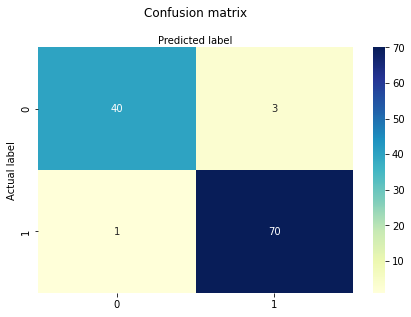

In [24]:
cancer_cnf_matrix = confusion_matrix(cancer_Y_test, cancer_Y_pred)
cancer_cnf_matrix
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cancer_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
print("Accuracy:",metrics.accuracy_score(cancer_Y_test, cancer_Y_pred))
print("Precision:",metrics.precision_score(cancer_Y_test, cancer_Y_pred, pos_label="Benign"))
print("Recall:",metrics.recall_score(cancer_Y_test, cancer_Y_pred, pos_label="Benign"))

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349


In [26]:
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'] 

x = cancer_dataset.loc[:, features].values 
y = cancer_dataset.loc[:,['label']].values  
x = StandardScaler().fit_transform(x) 

In [27]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(x) 
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1','principal component 2']) 

In [28]:
finalDf = pd.concat([principalDf, cancer_dataset[['label']]], axis = 1)

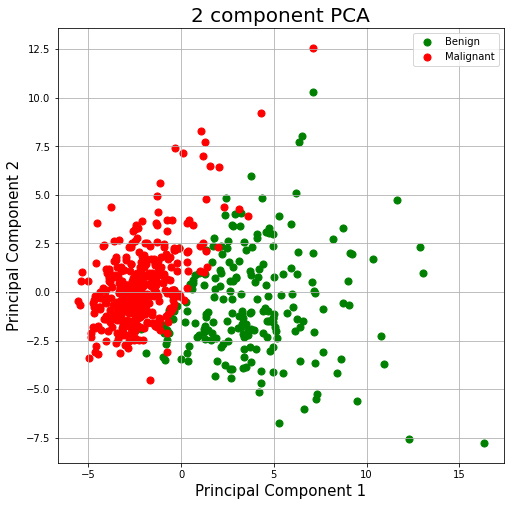

In [29]:
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 
targets = ['Benign', 'Malignant'] 
colors = ['g', 'r'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['label'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] 
               , finalDf.loc[indicesToKeep, 'principal component 2'] 
               , c = color 
               , s = 50) 
ax.legend(targets) 
ax.grid() 

In [30]:
Log_Model = LogisticRegression()
columns = []
LogPCAaccuracy = np.zeros(30)
LogPCAPrecision = np.zeros(30)
LogPCARecall = np.zeros(30)
for i in range(1,30):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(cancer_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, cancer_dataset[['label']]], axis = 1)
    principalComponentstest = pca.fit_transform(cancer_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, cancer_dataset[['label']]], axis = 1)
    Log_Model_train = Log_Model.fit(principalDftrain.values, cancer_Y_train)
    cancer_Y_predPCA = Log_Model_train.predict(principalDftest.values)
    print("Accuracy " + str(i) + ":",metrics.accuracy_score(cancer_Y_test, cancer_Y_predPCA))
    LogPCAaccuracy[i] = metrics.accuracy_score(cancer_Y_test, cancer_Y_predPCA)
    print("Precision " + str(i) + ":", metrics.precision_score(cancer_Y_test, cancer_Y_predPCA, pos_label="Benign"))
    LogPCAPrecision[i] = metrics.precision_score(cancer_Y_test, cancer_Y_predPCA, pos_label="Benign")
    print("Recall " + str(i) + ":",metrics.recall_score(cancer_Y_test, cancer_Y_predPCA, pos_label="Benign"))
    LogPCARecall[i] = metrics.recall_score(cancer_Y_test, cancer_Y_predPCA, pos_label="Benign")
    columns = np.array(columns)

Accuracy 1: 0.9385964912280702
Precision 1: 0.9736842105263158
Recall 1: 0.8604651162790697
Accuracy 2: 0.9736842105263158
Precision 2: 0.9761904761904762
Recall 2: 0.9534883720930233
Accuracy 3: 0.9649122807017544
Precision 3: 1.0
Recall 3: 0.9069767441860465
Accuracy 4: 0.9473684210526315
Precision 4: 0.9512195121951219
Recall 4: 0.9069767441860465
Accuracy 5: 0.9473684210526315
Precision 5: 0.9111111111111111
Recall 5: 0.9534883720930233
Accuracy 6: 0.9385964912280702
Precision 6: 0.9090909090909091
Recall 6: 0.9302325581395349
Accuracy 7: 0.9385964912280702
Precision 7: 0.9090909090909091
Recall 7: 0.9302325581395349
Accuracy 8: 0.9385964912280702
Precision 8: 0.8913043478260869
Recall 8: 0.9534883720930233
Accuracy 9: 0.9473684210526315
Precision 9: 0.9111111111111111
Recall 9: 0.9534883720930233
Accuracy 10: 0.956140350877193
Precision 10: 0.9130434782608695
Recall 10: 0.9767441860465116
Accuracy 11: 0.956140350877193
Precision 11: 0.9130434782608695
Recall 11: 0.9767441860465116

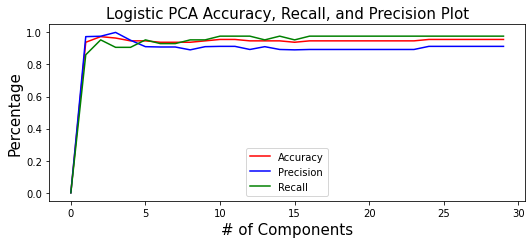

In [31]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.array(range(0,30))
y = LogPCAaccuracy
z = LogPCAPrecision
v = LogPCARecall
plt.title("Logistic PCA Accuracy, Recall, and Precision Plot", fontsize = 15)
plt.plot(x, y, color="red", label="Accuracy")
plt.plot(x, z, color="blue", label="Precision")
plt.plot(x, v, color="green", label="Recall")
plt.xlabel('# of Components', fontsize = 15) 
plt.ylabel('Percentage', fontsize = 15) 
leg = plt.legend(loc = 'lower center')
plt.show()

In [32]:
columns = []
BayesPCAaccuracy = np.zeros(30)
BayesPCAPrecision = np.zeros(30)
BayesPCARecall = np.zeros(30)
for i in range(1,30):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(cancer_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, cancer_dataset[['label']]], axis = 1)
    principalComponentstest = pca.fit_transform(cancer_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, cancer_dataset[['label']]], axis = 1)
    Bayes_Model_train = BayesClass.fit(principalDftrain.values, cancer_Y_train)
    cancer_Y_predPCA = Bayes_Model_train.predict(principalDftest.values)
    print("Accuracy " + str(i) + ":",metrics.accuracy_score(cancer_Y_test, cancer_Y_predPCA))
    BayesPCAaccuracy[i] = metrics.accuracy_score(cancer_Y_test, cancer_Y_predPCA)
    print("Precision " + str(i) + ":", metrics.precision_score(cancer_Y_test, cancer_Y_predPCA, pos_label="Benign"))
    BayesPCAPrecision[i] = metrics.precision_score(cancer_Y_test, cancer_Y_predPCA, pos_label="Benign")
    print("Recall " + str(i) + ":",metrics.recall_score(cancer_Y_test, cancer_Y_predPCA, pos_label="Benign"))
    BayesPCARecall[i] = metrics.recall_score(cancer_Y_test, cancer_Y_predPCA, pos_label="Benign")
    columns = np.array(columns)

Accuracy 1: 0.9385964912280702
Precision 1: 0.9736842105263158
Recall 1: 0.8604651162790697
Accuracy 2: 0.956140350877193
Precision 2: 1.0
Recall 2: 0.8837209302325582
Accuracy 3: 0.9210526315789473
Precision 3: 0.9473684210526315
Recall 3: 0.8372093023255814
Accuracy 4: 0.9298245614035088
Precision 4: 0.926829268292683
Recall 4: 0.8837209302325582
Accuracy 5: 0.9385964912280702
Precision 5: 0.9285714285714286
Recall 5: 0.9069767441860465
Accuracy 6: 0.9210526315789473
Precision 6: 0.9473684210526315
Recall 6: 0.8372093023255814
Accuracy 7: 0.8859649122807017
Precision 7: 0.9166666666666666
Recall 7: 0.7674418604651163
Accuracy 8: 0.8947368421052632
Precision 8: 0.918918918918919
Recall 8: 0.7906976744186046
Accuracy 9: 0.8947368421052632
Precision 9: 0.918918918918919
Recall 9: 0.7906976744186046
Accuracy 10: 0.8947368421052632
Precision 10: 0.918918918918919
Recall 10: 0.7906976744186046
Accuracy 11: 0.8947368421052632
Precision 11: 0.918918918918919
Recall 11: 0.7906976744186046
Acc

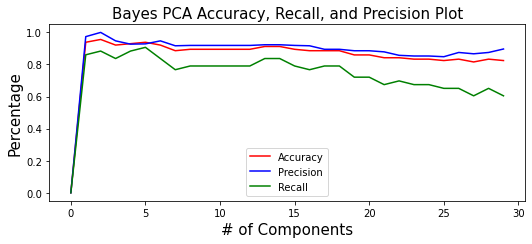

In [33]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.array(range(0,30))
y = BayesPCAaccuracy
z = BayesPCAPrecision
v = BayesPCARecall
plt.title("Bayes PCA Accuracy, Recall, and Precision Plot", fontsize = 15)
plt.plot(x, y, color="red", label="Accuracy")
plt.plot(x, z, color="blue", label="Precision")
plt.plot(x, v, color="green", label="Recall")
plt.xlabel('# of Components', fontsize = 15) 
plt.ylabel('Percentage', fontsize = 15) 
leg = plt.legend(loc = 'lower center')
plt.show()